In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import RidgeClassifier





# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

------
## Reading Data

In [2]:
Trained_Data = pd.read_csv("/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv" , low_memory=False)
#Tested_Data  = pd.read_csv("../input/nslkdd/ML-EdgeIIoT-dataset.csv" , sep = "," , encoding = 'utf-8')

---------
## Exploring Data

In [3]:
Trained_Data

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,2021 23:24:32.698981000,193.152.82.43,192.168.0.128,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157796,2021 23:24:32.699354000,253.52.1.213,192.168.0.128,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157797,2021 23:24:32.719931000,107.155.221.49,192.168.0.128,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157798,2021 23:24:32.752054000,77.242.58.228,192.168.0.128,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [4]:
#Tested_Data

---------
## Columns Modification

In [5]:
Columns = (['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len',
       'mqtt.msg_decoded_as', 'mqtt.msg', 'mqtt.msgtype', 'mqtt.proto_len',
       'mqtt.protoname', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver',
       'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label',
       'Attack_type'])



In [6]:
Trained_Data.columns = Columns
#Tested_Data.columns  = Columns

In [7]:
Trained_Data.head(10)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
5,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
6,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
7,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
8,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
9,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [8]:
#Tested_Data.head(10)

-------
## Data Description

In [9]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  object 
 1   ip.src_host                157800 non-null  object 
 2   ip.dst_host                157800 non-null  object 
 3   arp.dst.proto_ipv4         157800 non-null  object 
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  object 
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null  object 
 12  http.content_length        157800 non-null  float64
 13  http.request.uri.query     15

In [10]:
#Tested_Data.info()

In [11]:
Trained_Data.describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,157800.000000,157800.000000,157800.000000,157800.000000,1.578000e+05,157800.0,157800.000000,157800.000000,157800.0,1.578000e+05,...,157800.000000,157800.0,157800.000000,157800.000000,157800.000000,157800.000000,157800.0,157800.0,157800.0,157800.000000
mean,0.014195,0.059848,3047.291838,3239.979778,4.046816e+04,0.0,14.715520,0.045748,0.0,7.160039e+07,...,0.419341,0.0,0.161331,0.031686,0.189506,0.031686,0.0,0.0,0.0,0.846001
std,0.149783,0.596245,11144.328203,11406.072994,1.764075e+06,0.0,229.659671,0.208938,0.0,3.101231e+08,...,3.606594,0.0,1.293453,0.354598,2.124206,0.354598,0.0,0.0,0.0,0.360949
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,1.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,4.790000e+02,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,2.000000,6.000000,65532.000000,65524.000000,7.728902e+07,0.0,83655.000000,1.000000,0.0,2.147333e+09,...,39.000000,0.0,14.000000,4.000000,24.000000,4.000000,0.0,0.0,0.0,1.000000


In [12]:
#Tested_Data.describe()

-----
### Exploring Responses

In [13]:
Results = set(Trained_Data['Attack_type'].values)
print(Results,end=" ")

{'Ransomware', 'DDoS_HTTP', 'SQL_injection', 'MITM', 'Port_Scanning', 'XSS', 'Backdoor', 'Uploading', 'Vulnerability_scanner', 'DDoS_UDP', 'DDoS_ICMP', 'Password', 'DDoS_TCP', 'Normal', 'Fingerprinting'} 

## Classifying The Attack Results

In [14]:
# Creating a dictionary of Types (0,1,2,3,.....14) multi-class labels (normal,......,DDoS_ICMP)
attacks = {'Normal': 0 ,'MITM' :1, 'Uploading':2, 'Ransomware':3, 'SQL_injection':4,
       'DDoS_HTTP':5 , 'DDoS_TCP':6, 'Password':7, 'Port_Scanning':8,
       'Vulnerability_scanner':9, 'Backdoor':10, 'XSS':11, 'Fingerprinting':12,
       'DDoS_UDP':13, 'DDoS_ICMP':14 }
Trained_Data['intrusion']=Trained_Data['Attack_type'].map(attacks)

In [15]:
Trained_Data.head(10)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type,intrusion
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM,1
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM,1
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM,1
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM,1
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM,1
5,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM,1
6,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM,1
7,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM,1
8,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM,1
9,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM,1


In [16]:
#Tested_Data.head(10)

--------
## Data preprocessing


In [17]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg", "icmp.unused", "http.tls_port", 'dns.qry.type', 'dns.retransmit_request_in', "mqtt.msg_decoded_as", "mbtcp.trans_id", "mbtcp.unit_id", "http.request.method", "http.referer", "http.request.version", "dns.qry.name.len", "mqtt.conack.flags", "mqtt.protoname", "mqtt.topic"]


Trained_Data.drop(drop_columns, axis=1, inplace=True)

### Chechking for Missing Data

In [18]:
Trained_Data.isnull().sum()

arp.opcode                0
arp.hw.size               0
icmp.checksum             0
icmp.seq_le               0
http.content_length       0
http.response             0
tcp.ack                   0
tcp.ack_raw               0
tcp.checksum              0
tcp.connection.fin        0
tcp.connection.rst        0
tcp.connection.syn        0
tcp.connection.synack     0
tcp.flags                 0
tcp.flags.ack             0
tcp.len                   0
tcp.seq                   0
udp.stream                0
udp.time_delta            0
dns.qry.name              0
dns.qry.qu                0
dns.retransmission        0
dns.retransmit_request    0
mqtt.conflag.cleansess    0
mqtt.conflags             0
mqtt.hdrflags             0
mqtt.len                  0
mqtt.msgtype              0
mqtt.proto_len            0
mqtt.topic_len            0
mqtt.ver                  0
mbtcp.len                 0
Attack_label              0
Attack_type               0
intrusion                 0
dtype: int64

-----
- **There is no missing data**

In [19]:
#Tested_Data.isnull().sum()

--------
### Checking for Duplicates

In [20]:
Trained_Data.duplicated().sum()

5604

In [21]:
Trained_Data.drop_duplicates(subset=None, keep="first", inplace=True)
Trained_Data.duplicated().sum()

0

---------
- **There is no duplicated data**

In [22]:
#Tested_Data.duplicated().sum()

-------------
## Data Encoding

In [23]:
#categorical_columns = ['http.request.method', 'http.referer', 'http.request.version', 'dns.qry.name.len']
#for col in categorical_columns:
    #Trained_Data = pd.get_dummies(Trained_Data, columns=[col], prefix=[col], drop_first=True)


In [24]:
# Check for non-numeric columns
non_numeric_columns = Trained_Data.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Attack_type'], dtype='object')


In [25]:
#Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [26]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['Attack_type'] = attack_LE.fit_transform(Trained_Data["Attack_type"])
#Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])

----
## Data Splitting 

In [27]:
X = Trained_Data.drop('Attack_type', axis = 1)
X = Trained_Data.drop('Attack_label', axis = 1)
X = Trained_Data.drop('intrusion', axis = 1)


Y= Trained_Data['intrusion']


In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size= 0.25 , random_state=42)


---------
## Data Scaling

In [29]:
Ro_scaler = RobustScaler()
X_train = Ro_scaler.fit_transform(X_train) 
X_test= Ro_scaler.transform(X_test)

In [30]:
X_train.shape, Y_train.shape

((114147, 34), (114147,))

In [31]:
X_test.shape, Y_test.shape

((38049, 34), (38049,))

------
## Working on Trained Data
### VIF 

In [32]:
A = sm.add_constant(X_train.astype(float))
Est1 = sm.GLM(Y_train.astype(float), A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              intrusion   No. Observations:               114147
Model:                            GLM   Df Residuals:                   114118
Model Family:                Gaussian   Df Model:                           28
Link Function:               Identity   Scale:                          5.6705
Method:                          IRLS   Log-Likelihood:            -2.6099e+05
Date:                Wed, 15 May 2024   Deviance:                   6.4711e+05
Time:                        18:51:33   Pearson chi2:                 6.47e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9343
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8582      0.016    434.410      0.000       6.827       6.889
x1            -1.5017      1.493     -1.006      0.314      -4.427       1.424
x2            -0.3325      0.360     -0.924      0.355      -1.038       0.373
x3          2.995e-05      1e-06     29.960      0.000     2.8e-05    3.19e-05
x4          3.216e-05   9.89e-07     32.516      0.000    3.02e-05    3.41e-05
x5             0.0002   2.74e-05      7.101      0.000       0.000       0.000
x6             1.4023      0.039     35.550      0.000       1.325       1.480
x7          3.492e-07   1.41e-08     24.828      0.000    3.22e-07    3.77e-07
x8             0.0181      0.019      0.959      0.338      -0.019       0.055
x9            -0.2954      0.016    -17.994      0.000      -0.328      -0.263
x10           -0.1649      0.034     -4.916      0.000      -0.231      -0.099
x11           -1.2438      0.026    -46.984      0.000      -1.296      -1.192
x12           -5.2244      0.041   -127.661      0.000      -5.305      -5.144
x13           -0.1451      0.042     -3.474      0.001      -0.227      -0.063
x14           -0.0485      0.053     -0.920      0.358      -0.152       0.055
x15           -4.0838      0.063    -64.528      0.000      -4.208      -3.960
x16           -0.0029      0.000    -17.006      0.000      -0.003      -0.003
x17         5.407e-07   7.01e-08      7.714      0.000    4.03e-07    6.78e-07
x18         8.091e-07   2.17e-08     37.270      0.000    7.67e-07    8.52e-07
x19           -0.0157      0.001    -15.297      0.000      -0.018      -0.014
x20         2.425e-07   4.77e-08      5.081      0.000    1.49e-07    3.36e-07
x21           -0.0126      0.000    -40.543      0.000      -0.013      -0.012
x22            0.0977      0.038      2.585      0.010       0.024       0.172
x23        -4.772e-14   5.16e-14     -0.925      0.355   -1.49e-13    5.34e-14
x24           -0.0331      0.013     -2.532      0.011      -0.059      -0.007
x25           -0.0663      0.026     -2.532      0.011      -0.118      -0.015
x26            0.0022      0.000      5.534      0.000       0.001       0.003
x27            0.1266      0.041      3.121      0.002       0.047       0.206
x28            0.0001   2.48e-05      5.534      0.000    8.88e-05       0.000
x29           -0.1326      0.052     -2.532      0.011      -0.235      -0.030
x30           -0.1964      0.066     -2.994      0.003      -0.325      -0.068
x31           -0.1326      0.052     -2.532      0.011      -0.235      -0.030
x32                 0          0        nan        nan           0           0
x33            7.1142      0.024    300.581      0.000       7.068       7.161
x34           -0.7160      0.015    -47.404      0.000      -0.746      -0.686
==============================================================================
""

--------
## Data Modeling

### Evaluating Function

In [33]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value = Model_Abb.predict(X_test)
    
    Accuracy = metrics.accuracy_score(Y_test, Pred_Value)
    Precision = metrics.precision_score(Y_test, Pred_Value, average='weighted')
    Recall = metrics.recall_score(Y_test, Pred_Value, average='weighted')
    F1_score = metrics.f1_score(Y_test, Pred_Value, average='weighted')
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,2)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,2)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,2)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,2)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix, class_names=['Normal','MITM', 'Uploading', 'Ransomware', 'SQL_injection',
       'DDoS_HTTP', 'DDoS_TCP', 'Password', 'Port_Scanning',
       'Vulnerability_scanner', 'Backdoor', 'XSS', 'Fingerprinting',
       'DDoS_UDP', 'DDoS_ICMP' ], figsize=(8,8), colorbar= "blue")
    
    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(Y_test))
    y_score = Model_Abb.predict_proba(X_test)
    y_onehot_test = pd.get_dummies(Y_test)
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_onehot_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC AUC
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_onehot_test.values.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

    # Plot ROC curve
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.plot(fpr["micro"], tpr["micro"], label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})", color="deeppink", linestyle=":", linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"], label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})", color="navy", linestyle=":", linewidth=4)
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    class_names = ['Normal','MITM', 'Uploading', 'Ransomware', 'SQL_injection',
       'DDoS_HTTP', 'DDoS_TCP', 'Password', 'Port_Scanning',
       'Vulnerability_scanner', 'Backdoor', 'XSS', 'Fingerprinting',
       'DDoS_UDP', 'DDoS_ICMP' ]
    for class_id, color in zip(range(n_classes), colors):
        plt.plot(fpr[class_id], tpr[class_id], color=color, lw=2, label=f"ROC curve for {class_names[class_id]} (AUC = {roc_auc[class_id]:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(Model_Name)
    plt.legend(loc="lower right")
    plt.show()



### Grid Search Function

In [34]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

----------------
## 1. Logistic Regression

In [35]:
LR= LogisticRegression()
LR.fit(X_train , Y_train)

LogisticRegression()

In [36]:
LR.score(X_train, Y_train), LR.score(X_test, Y_test)

(0.4284124856544631, 0.42834240058871453)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.43

The Logistic Regression Model Precision  = 0.35

The Logistic Regression Model Recall     = 0.43

The Logistic Regression Model F1 Score   = 0.36

--------------------------------------------------



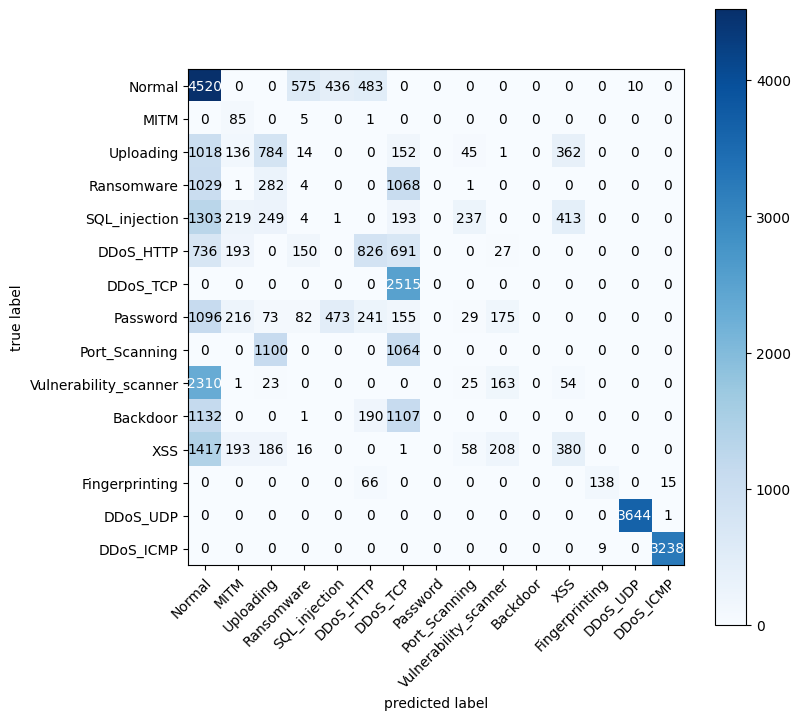

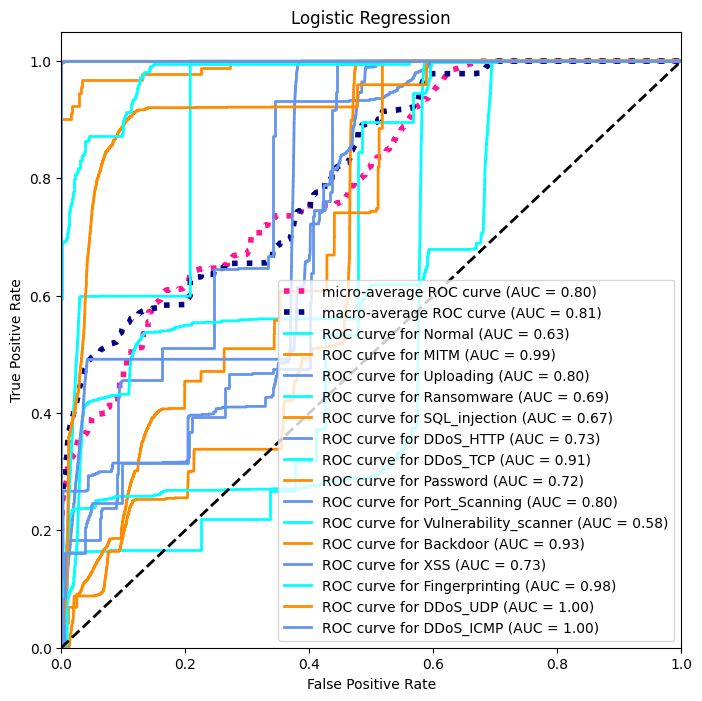

In [37]:
Evaluate('Logistic Regression', LR, X_test, Y_test)

----------------
## 2. Decision Tree Classifier

In [38]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [39]:
DT.score(X_train, Y_train), DT.score(X_test, Y_test)

(0.4004573050540093, 0.40248101132749875)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.4

The Decision Tree Classifier Model Precision  = 0.47

The Decision Tree Classifier Model Recall     = 0.4

The Decision Tree Classifier Model F1 Score   = 0.31

--------------------------------------------------



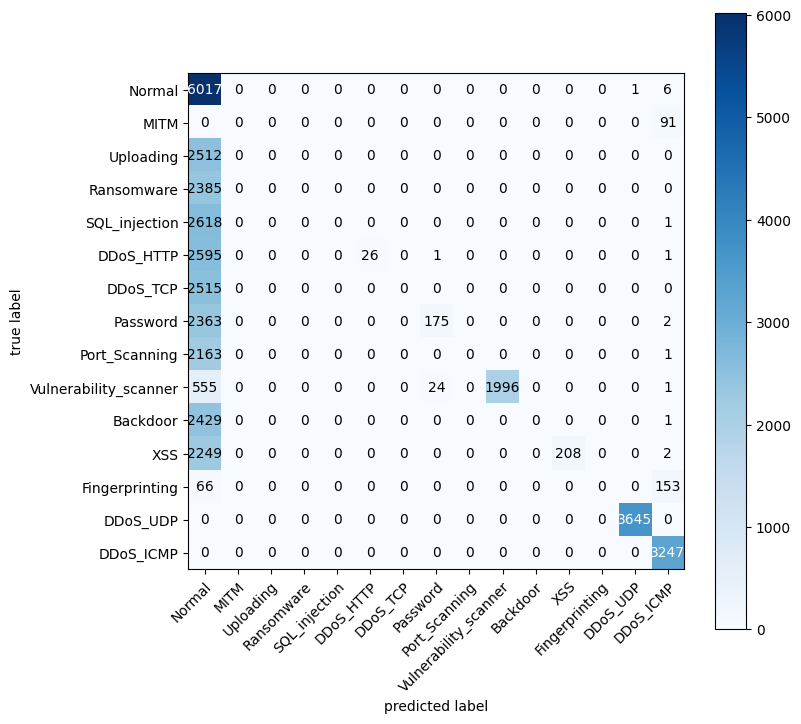

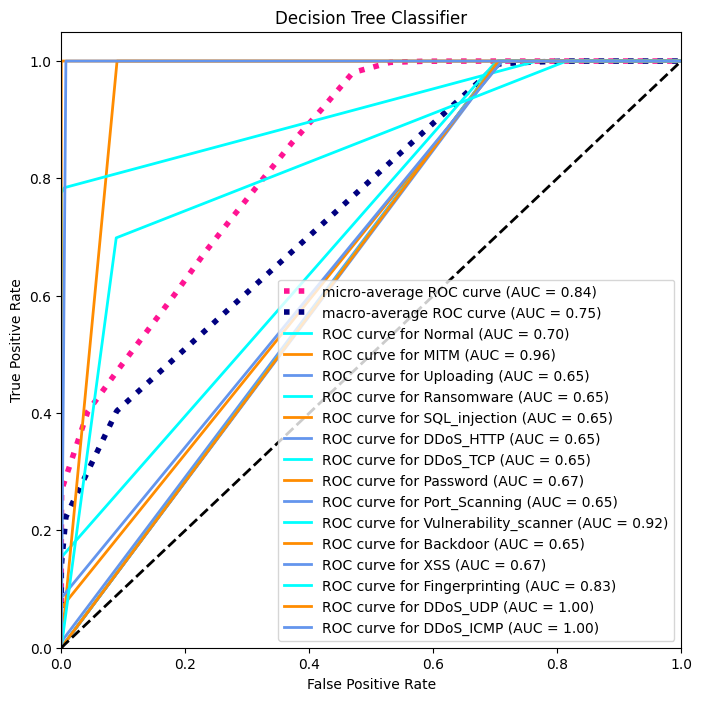

In [40]:
Evaluate('Decision Tree Classifier', DT, X_test, Y_test)

[Text(0.5625, 0.9, 'x[4] <= 0.5\ngini = 0.916\nsamples = 114147\nvalue = [18077, 267, 7702, 7304, 7663, 7872, 7732, 7432, 6757\n7486, 7435, 7084, 634, 10853, 9849]'),
 Text(0.3125, 0.7, 'x[17] <= 143.5\ngini = 0.91\nsamples = 107117\nvalue = [18077, 267, 7702, 7304, 7663, 7741, 7732, 6910, 6757\n1626, 7435, 6567, 634, 10853, 9849]'),
 Text(0.1875, 0.5, 'x[26] <= 1.0\ngini = 0.902\nsamples = 96256\nvalue = [18067, 267, 7702, 7304, 7663, 7741, 7732, 6910, 6757\n1626, 7435, 6567, 634, 2, 9849]'),
 Text(0.125, 0.3, 'x[13] <= -0.833\ngini = 0.907\nsamples = 93396\nvalue = [15207, 267, 7702, 7304, 7663, 7741, 7732, 6910, 6757\n1626, 7435, 6567, 634, 2, 9849]'),
 Text(0.0625, 0.1, 'gini = 0.132\nsamples = 10584\nvalue = [21, 267, 2, 3, 2, 0, 0, 1, 2, 2, 2, 1, 430\n2, 9849]'),
 Text(0.1875, 0.1, 'gini = 0.896\nsamples = 82812\nvalue = [15186, 0, 7700, 7301, 7661, 7741, 7732, 6909, 6755\n1624, 7433, 6566, 204, 0, 0]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 2860\nvalue = [2860, 0, 0, 0, 0, 0, 

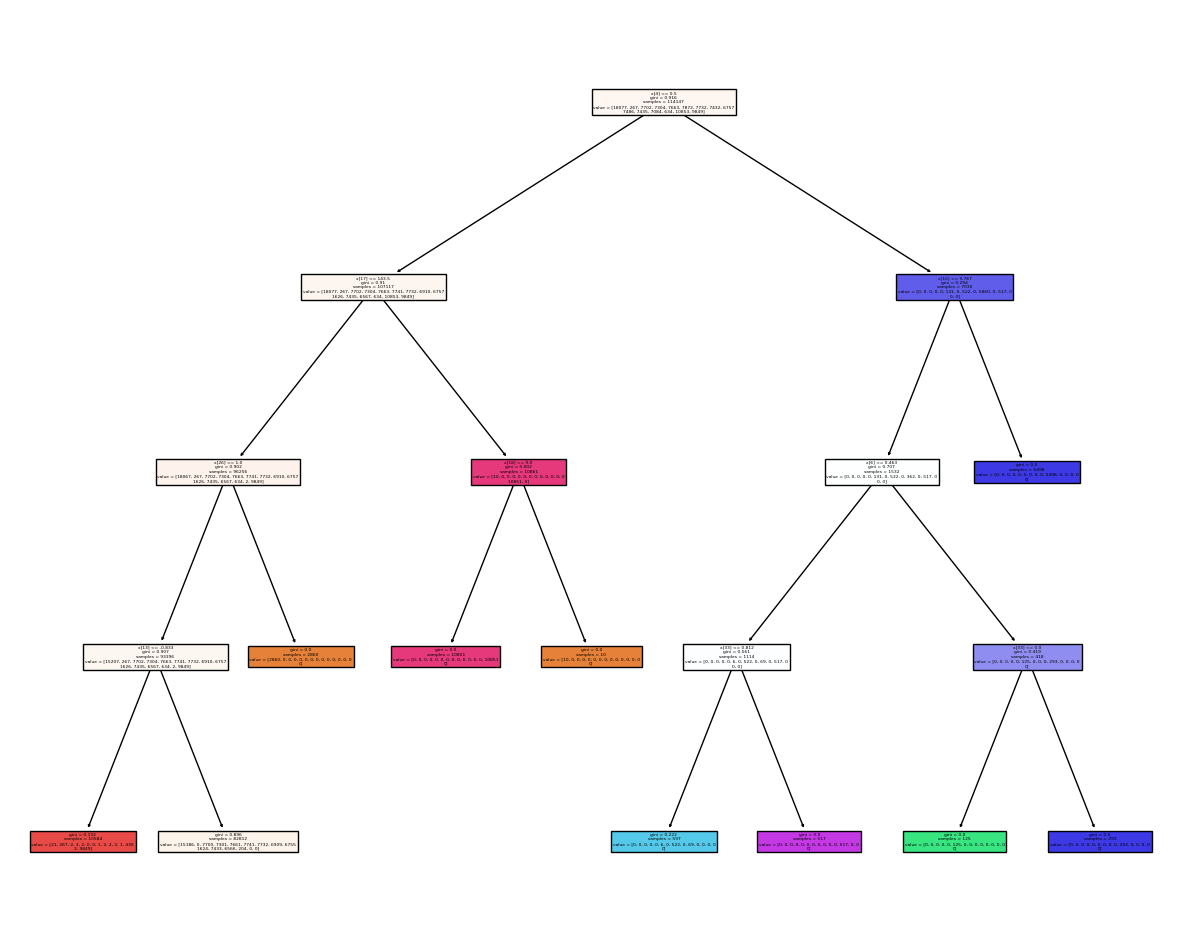

In [41]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

----------------
## 3. Random Forest Classifier

In [42]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={ 'max_depth': max_depth}

In [43]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train, Y_train)

RandomForestClassifier(max_depth=11)

In [44]:
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [45]:
RF.score(X_train, Y_train), RF.score(X_test, Y_test)

(1.0, 0.9997371810034429)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model Recall     = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

--------------------------------------------------



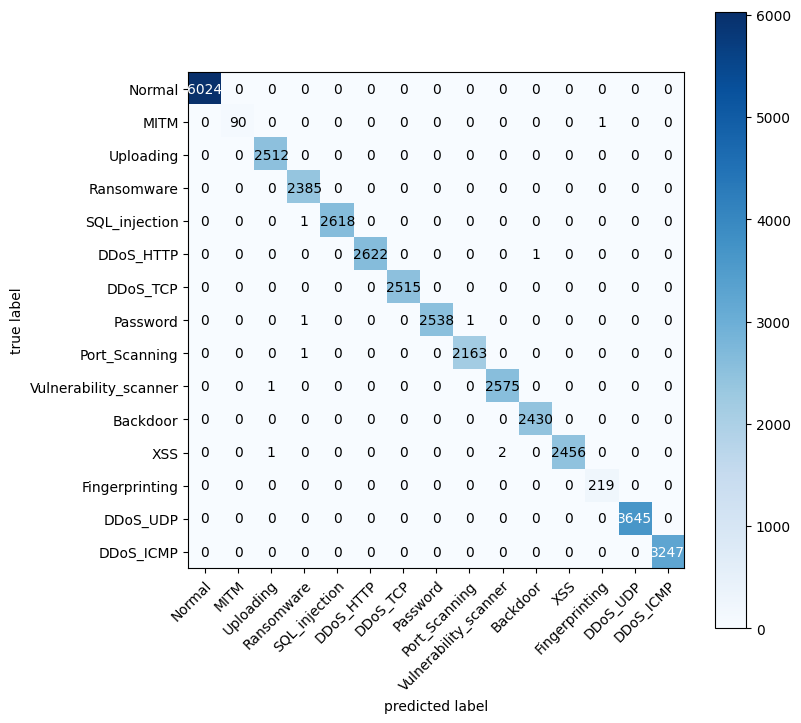

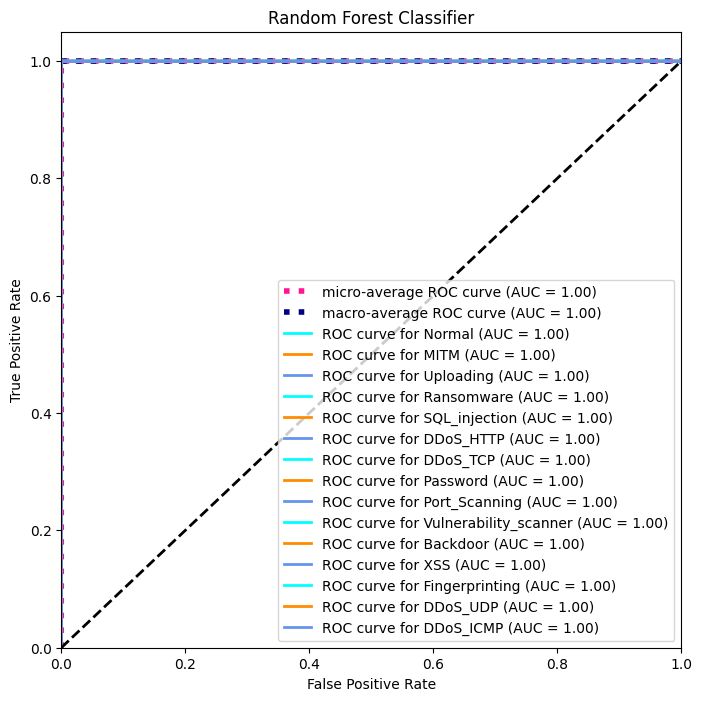

In [46]:
Evaluate('Random Forest Classifier', RF, X_test, Y_test)

----------------
## 4. KNN-Model

In [47]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [48]:
KNN.score(X_train, Y_train), KNN.score(X_test, Y_test)

(0.9504498585157736, 0.9337433309679624)

--------------------------------------------------

The KNN Model Accuracy   = 0.93

The KNN Model Precision  = 0.94

The KNN Model Recall     = 0.93

The KNN Model F1 Score   = 0.93

--------------------------------------------------



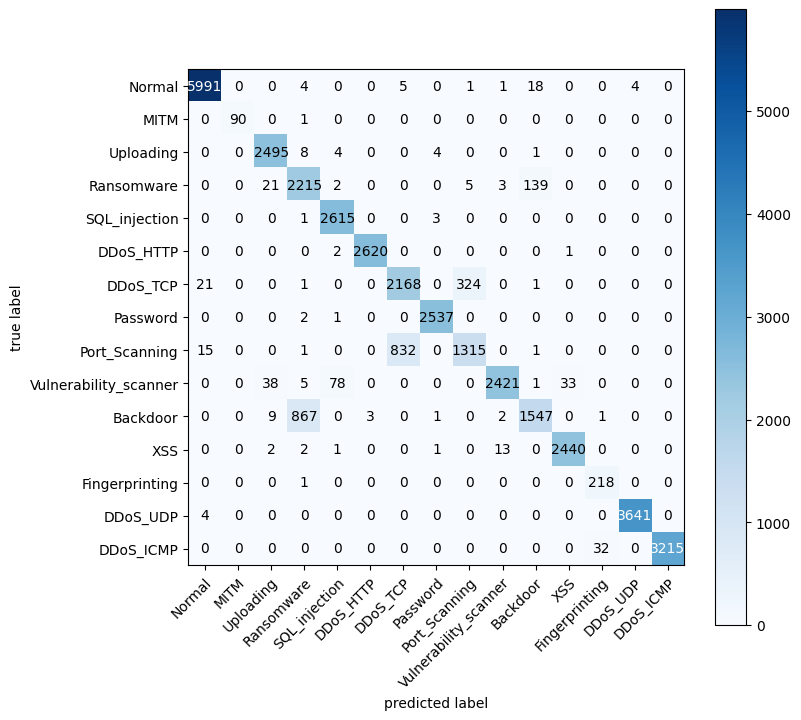

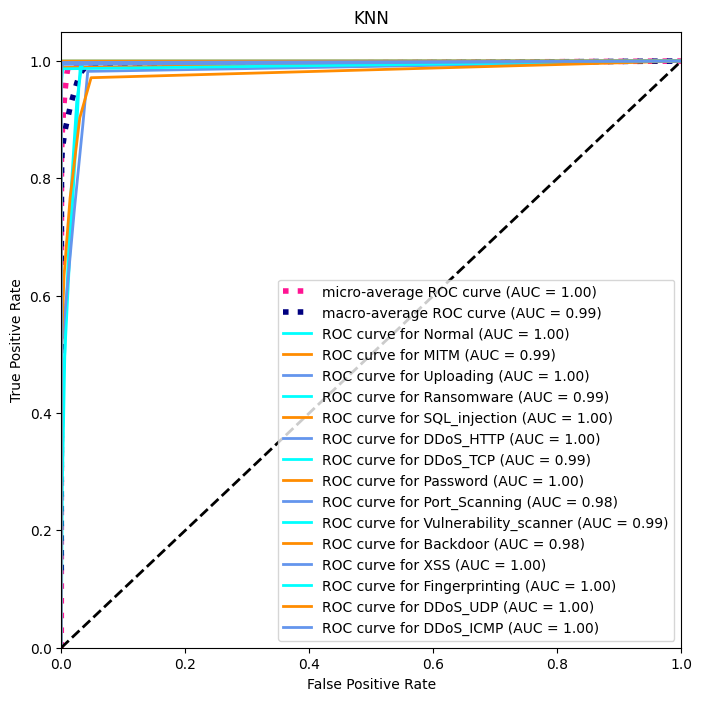

In [49]:
Evaluate('KNN', KNN, X_test, Y_test)

----------------
## 5. SVM Classifier

### 1st Kernel

In [50]:
# Create LinearSVC classifier without probability estimation
LinearSVC_classifier = LinearSVC()

# Wrap LinearSVC inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_SVC = CalibratedClassifierCV(LinearSVC_classifier, method='sigmoid')

# Fit the classifier
Platt_SVC.fit(X_train, Y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [51]:
Platt_SVC.score(X_train, Y_train), Platt_SVC.score(X_test, Y_test)

(0.3862387973402718, 0.38445162816368367)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.38

The SVM Linear SVC Kernel Model Precision  = 0.32

The SVM Linear SVC Kernel Model Recall     = 0.38

The SVM Linear SVC Kernel Model F1 Score   = 0.32

--------------------------------------------------



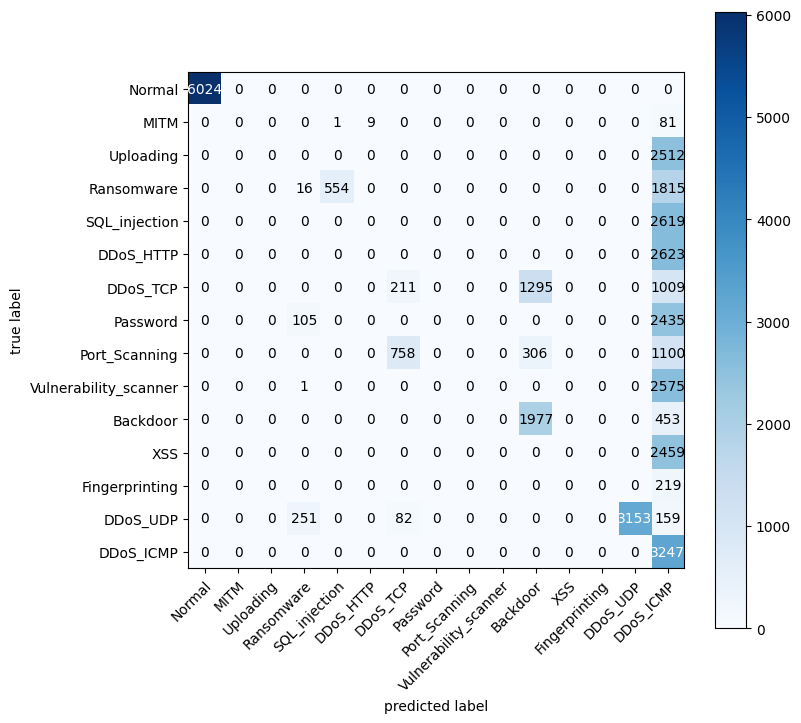

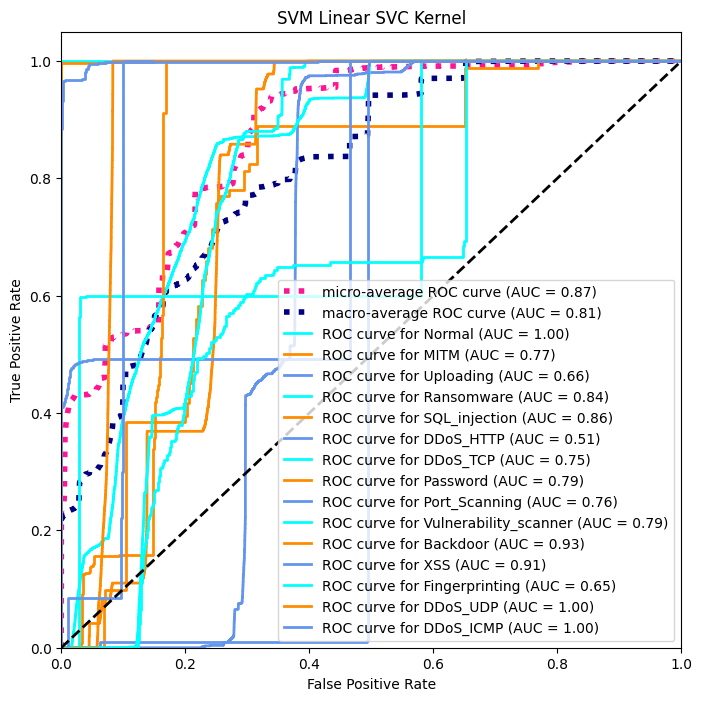

In [52]:
Evaluate('SVM Linear SVC Kernel',Platt_SVC, X_test, Y_test)

----------------
## 6. Gradient Boosting Classifier

In [53]:
# Instantiate and fit the Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(X_train, Y_train)


GradientBoostingClassifier()

In [54]:
# Print the training and testing scores
print("Gradient Boosting Classifier Training Score:", GB.score(X_train, Y_train))
print("Gradient Boosting Classifier Testing Score:", GB.score(X_test, Y_test))

Gradient Boosting Classifier Training Score: 1.0
Gradient Boosting Classifier Testing Score: 0.9999737181003443


--------------------------------------------------

The Gradient Boosting Classifier Model Accuracy   = 1.0

The Gradient Boosting Classifier Model Precision  = 1.0

The Gradient Boosting Classifier Model Recall     = 1.0

The Gradient Boosting Classifier Model F1 Score   = 1.0

--------------------------------------------------



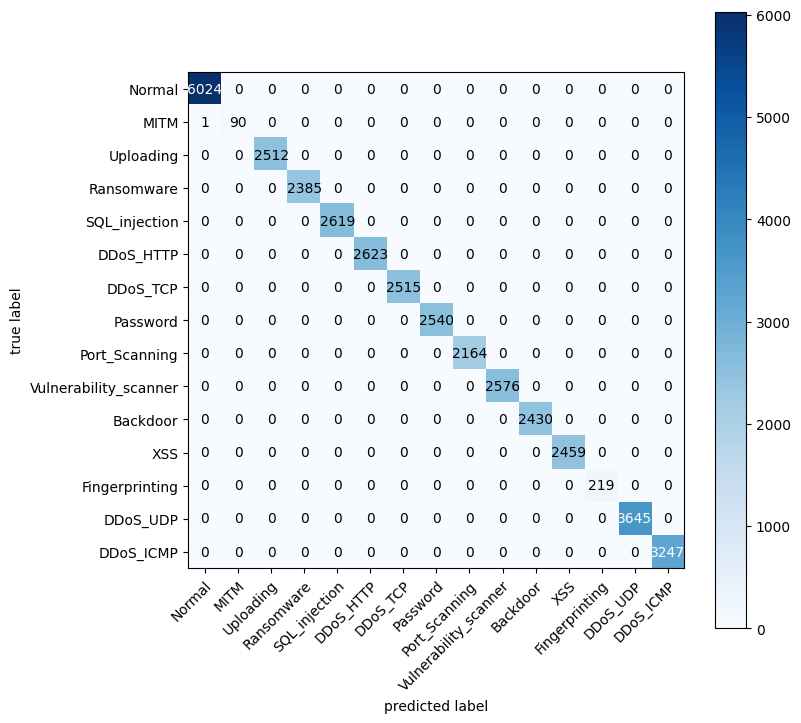

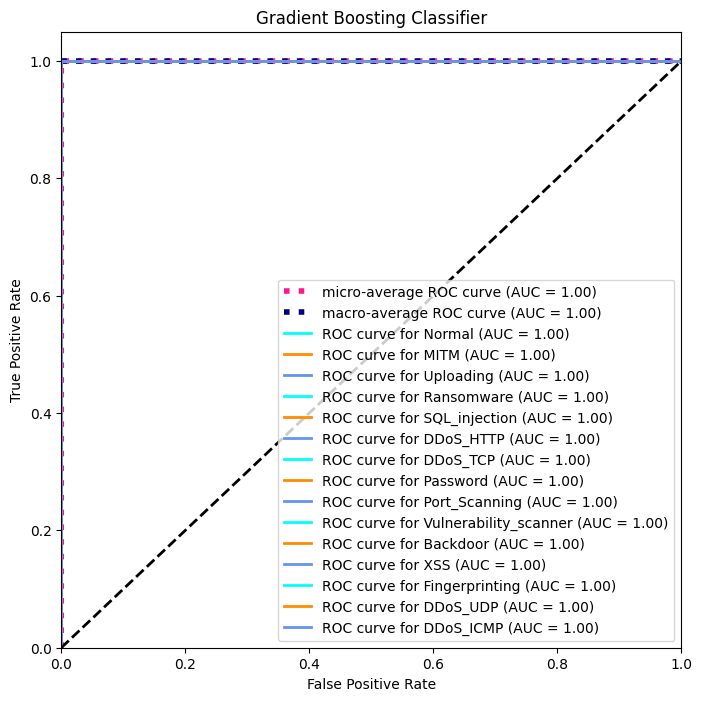

In [55]:
# Evaluate the Gradient Boosting Classifier
Evaluate('Gradient Boosting Classifier', GB, X_test, Y_test)

----------------
## 7. Extreme Gradient Boosting (XGBoost) Classifier

In [56]:
# Instantiate and fit the XGBoost Classifier
XGB = xgb.XGBClassifier(n_estimators=100, random_state=42)
XGB.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [57]:
# Print the training and testing scores
print("XGBoost Classifier Training Score:", XGB.score(X_train, Y_train))
print("XGBoost Classifier Testing Score:", XGB.score(X_test, Y_test))

XGBoost Classifier Training Score: 1.0
XGBoost Classifier Testing Score: 0.9999737181003443


--------------------------------------------------

The XGBoost Classifier Model Accuracy   = 1.0

The XGBoost Classifier Model Precision  = 1.0

The XGBoost Classifier Model Recall     = 1.0

The XGBoost Classifier Model F1 Score   = 1.0

--------------------------------------------------



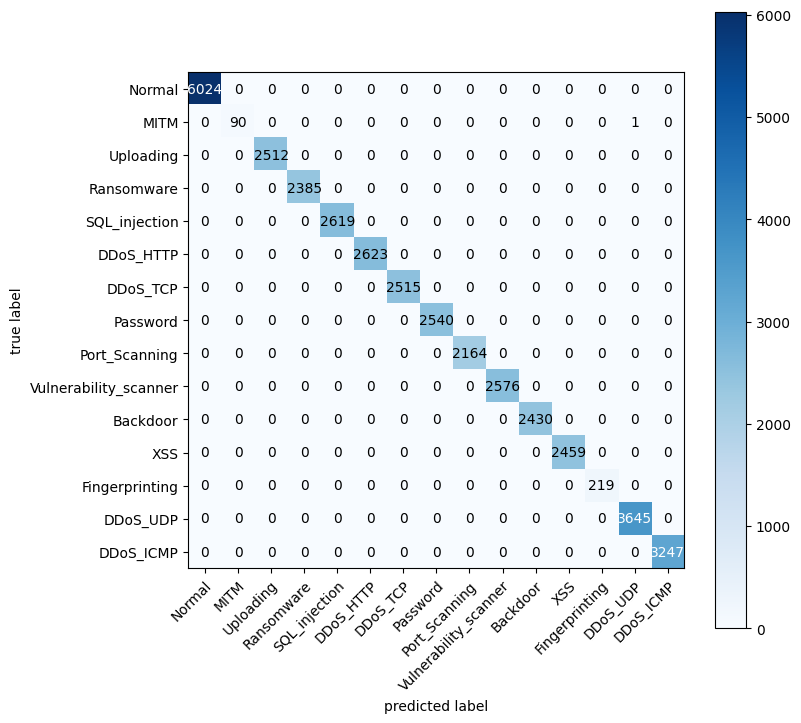

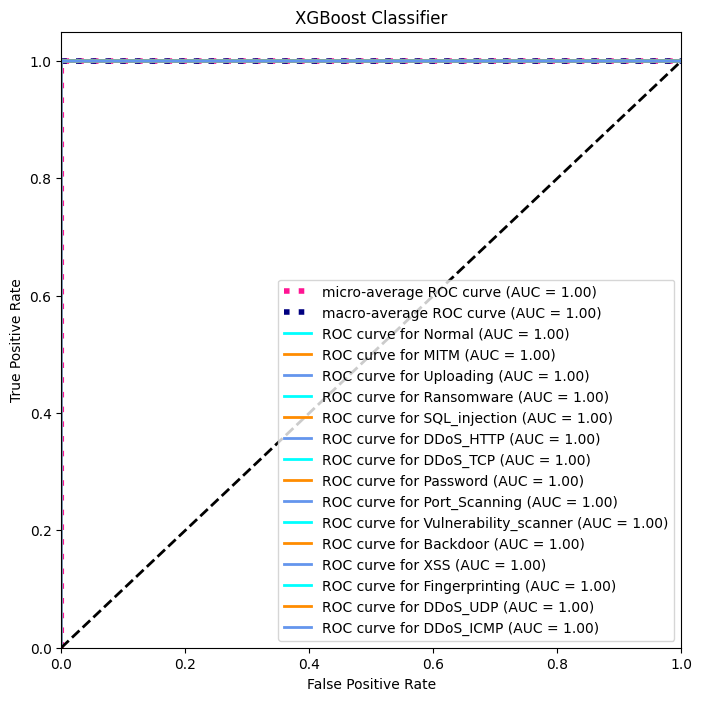

In [58]:
# Evaluate the XGBoost Classifier
Evaluate('XGBoost Classifier', XGB, X_test, Y_test)

----------------
## 8. Light Gradient Boosting Machine (LGBM) Classifier

In [59]:
# Instantiate and fit the LGBM Classifier
LGBM = lgb.LGBMClassifier()
LGBM.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2436
[LightGBM] [Info] Number of data points in the train set: 114147, number of used features: 30
[LightGBM] [Info] Start training from score -1.842847
[LightGBM] [Info] Start training from score -6.057994
[LightGBM] [Info] Start training from score -2.696007
[LightGBM] [Info] Start training from score -2.749065
[LightGBM] [Info] Start training from score -2.701084
[LightGBM] [Info] Start training from score -2.674175
[LightGBM] [Info] Start training from score -2.692120
[LightGBM] [Info] Start training from score -2.731692
[LightGBM] [Info] Start training from score -2.826908
[LightGBM] [Info] Start training from score -2.724452
[LightGBM] [Info] Start training from score -2.731289
[LightGBM] [Info] Start training from score -2.77964

LGBMClassifier()

In [60]:
# Print the training and testing scores
print("LGBM Classifier Training Score:", LGBM.score(X_train, Y_train))
print("LGBM Classifier Testing Score:", LGBM.score(X_test, Y_test))

LGBM Classifier Training Score: 1.0
LGBM Classifier Testing Score: 1.0


--------------------------------------------------

The LGBM Classifier Model Accuracy   = 1.0

The LGBM Classifier Model Precision  = 1.0

The LGBM Classifier Model Recall     = 1.0

The LGBM Classifier Model F1 Score   = 1.0

--------------------------------------------------



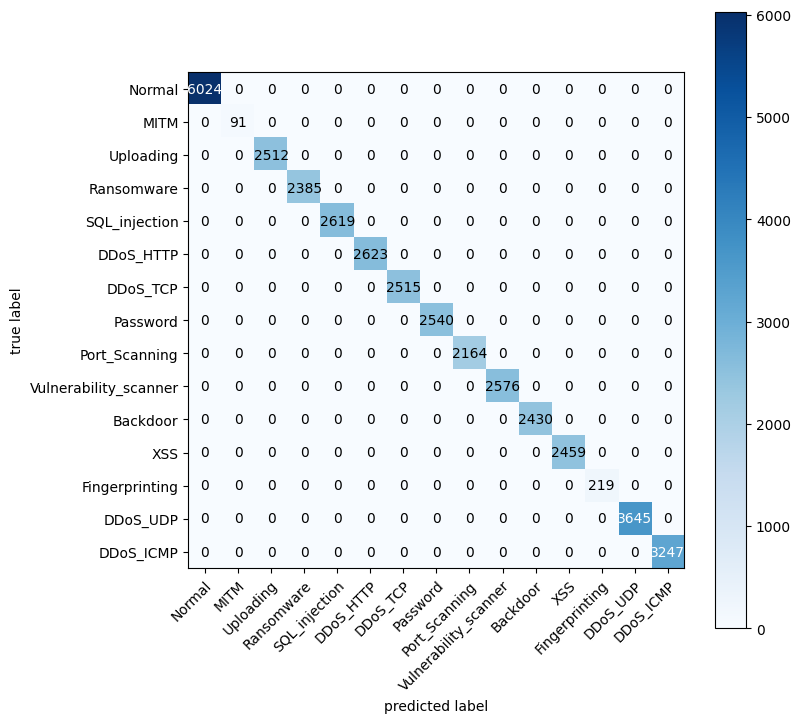

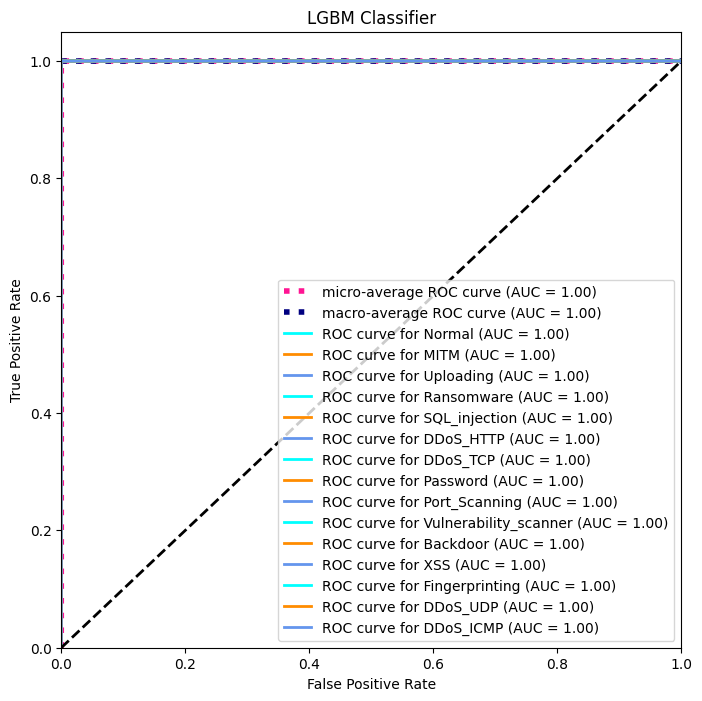

In [61]:
# Evaluate the LGBM Classifier
Evaluate('LGBM Classifier', LGBM, X_test, Y_test)

----------------
## 9. CatBoost Classifier

In [62]:
# Instantiate and fit the CatBoost Classifier
CatBoost = CatBoostClassifier(learning_rate=0.1,depth=6,n_estimators=100,l2_leaf_reg=3,random_state=42)
CatBoost.fit(X_train, Y_train)

0:	learn: 1.9646879	total: 313ms	remaining: 31s
1:	learn: 1.5626085	total: 563ms	remaining: 27.6s
2:	learn: 1.3451451	total: 806ms	remaining: 26s
3:	learn: 1.1853952	total: 1.05s	remaining: 25.3s
4:	learn: 1.0328437	total: 1.3s	remaining: 24.7s
5:	learn: 0.9261136	total: 1.55s	remaining: 24.3s
6:	learn: 0.8202097	total: 1.8s	remaining: 23.9s
7:	learn: 0.7422064	total: 2.05s	remaining: 23.6s
8:	learn: 0.6818673	total: 2.29s	remaining: 23.2s
9:	learn: 0.6222692	total: 2.56s	remaining: 23s
10:	learn: 0.5618847	total: 2.8s	remaining: 22.7s
11:	learn: 0.5165628	total: 3.06s	remaining: 22.5s
12:	learn: 0.4769077	total: 3.34s	remaining: 22.4s
13:	learn: 0.4377650	total: 3.6s	remaining: 22.1s
14:	learn: 0.4014256	total: 3.85s	remaining: 21.8s
15:	learn: 0.3708526	total: 4.11s	remaining: 21.6s
16:	learn: 0.3432874	total: 4.35s	remaining: 21.3s
17:	learn: 0.3199634	total: 4.6s	remaining: 21s
18:	learn: 0.2950694	total: 4.85s	remaining: 20.7s
19:	learn: 0.2735314	total: 5.1s	remaining: 20.4s
20:	

In [63]:
# Print the training and testing scores
print("CatBoost Classifier Training Score:", CatBoost.score(X_train, Y_train))
print("CatBoost Classifier Testing Score:", CatBoost.score(X_test, Y_test))


CatBoost Classifier Training Score: 1.0
CatBoost Classifier Testing Score: 1.0


--------------------------------------------------

The CatBoost Classifier Model Accuracy   = 1.0

The CatBoost Classifier Model Precision  = 1.0

The CatBoost Classifier Model Recall     = 1.0

The CatBoost Classifier Model F1 Score   = 1.0

--------------------------------------------------



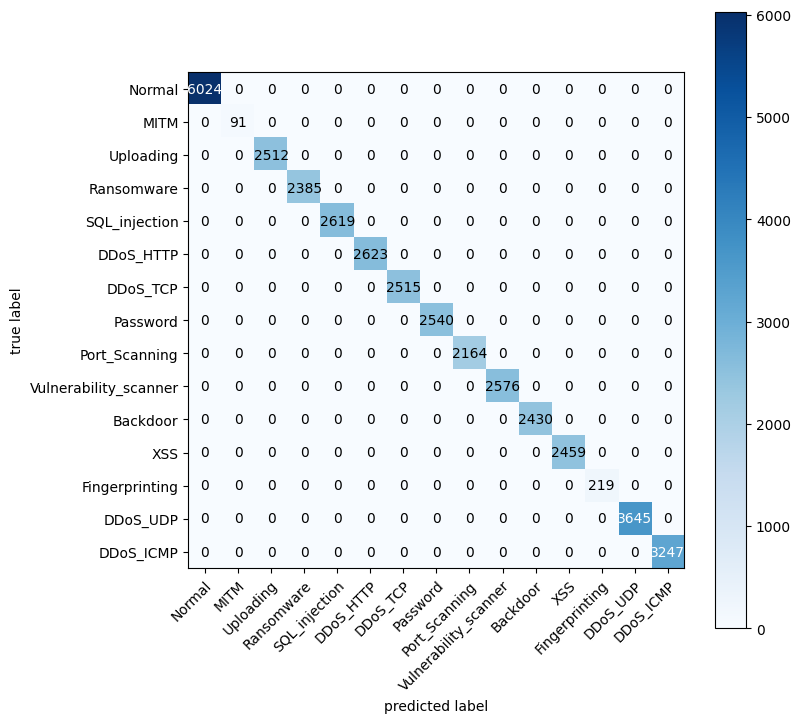

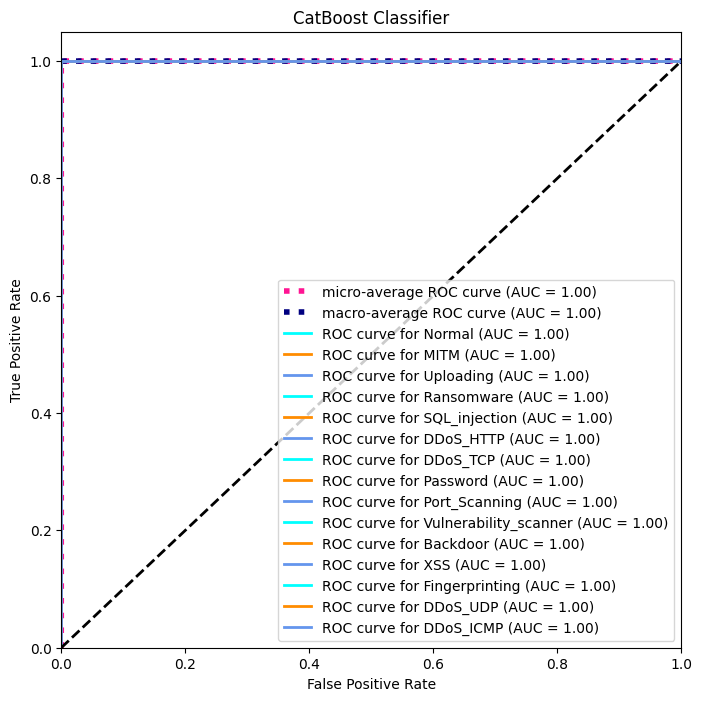

In [64]:
# Evaluate the CatBoost Classifier
Evaluate('CatBoost Classifier', CatBoost, X_test, Y_test)

----------------
## 10.Naive Bayes Classifier

In [65]:
# Instantiate and fit the Naive Bayes Classifier
NB = GaussianNB(var_smoothing=1e-9)
NB.fit(X_train, Y_train)

GaussianNB()

In [66]:
# Print the training and testing scores
print("Naive Bayes Classifier Training Score:", NB.score(X_train, Y_train))
print("Naive Bayes Classifier Testing Score:", NB.score(X_test, Y_test))


Naive Bayes Classifier Training Score: 0.4343346737102158
Naive Bayes Classifier Testing Score: 0.43357249862020025


--------------------------------------------------

The Naive Bayes Classifier Model Accuracy   = 0.43

The Naive Bayes Classifier Model Precision  = 0.56

The Naive Bayes Classifier Model Recall     = 0.43

The Naive Bayes Classifier Model F1 Score   = 0.42

--------------------------------------------------



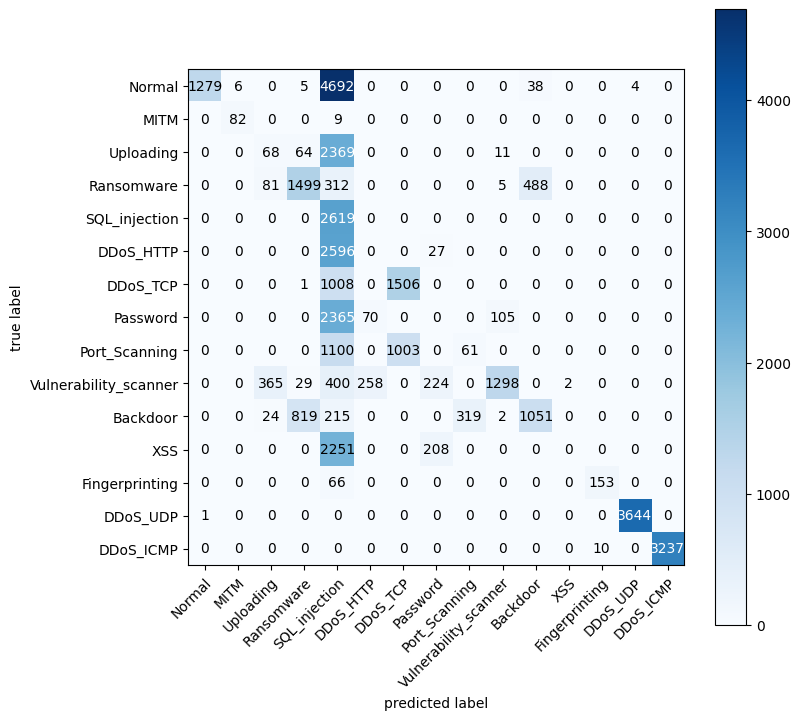

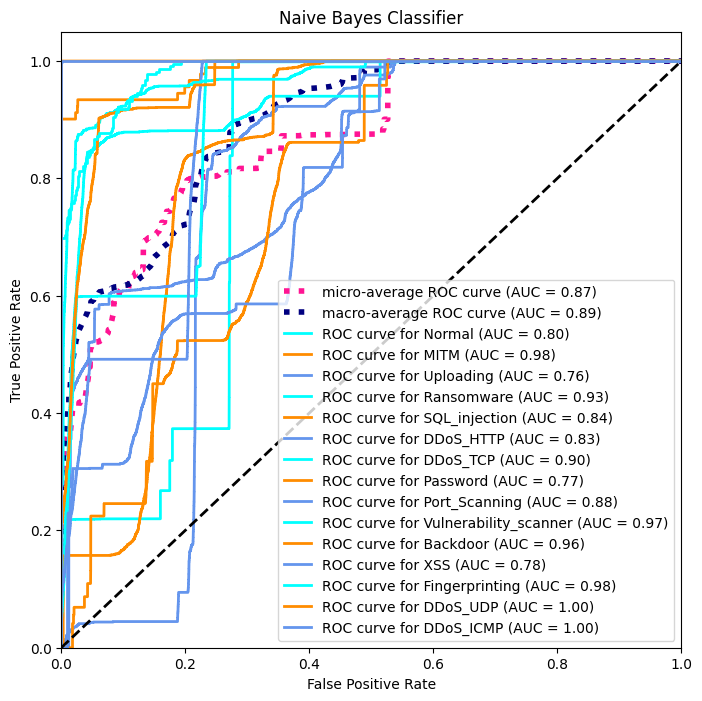

In [67]:
# Evaluate the Naive Bayes Classifier
Evaluate('Naive Bayes Classifier', NB, X_test, Y_test)

----------------
## 11.Linear Discriminant Analysis (LDA)

In [68]:
# Instantiate the LDA model 
LDA = LinearDiscriminantAnalysis(solver='lsqr')  
LDA.fit(X_train, Y_train)

LinearDiscriminantAnalysis(solver='lsqr')

In [69]:
# Print the training and testing scores
print("Linear Discriminant Analysis Training Score:", LDA.score(X_train, Y_train))
print("Linear Discriminant Analysis Testing Score:", LDA.score(X_test, Y_test))

Linear Discriminant Analysis Training Score: 0.41659439144261345
Linear Discriminant Analysis Testing Score: 0.4139924833766985


--------------------------------------------------

The Linear Discriminant Analysis Model Accuracy   = 0.41

The Linear Discriminant Analysis Model Precision  = 0.5

The Linear Discriminant Analysis Model Recall     = 0.41

The Linear Discriminant Analysis Model F1 Score   = 0.43

--------------------------------------------------



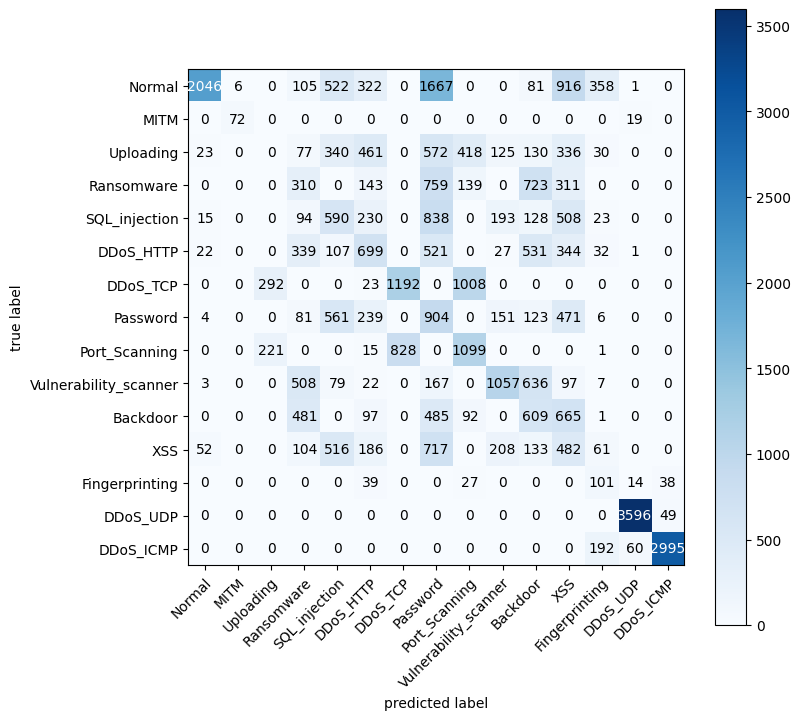

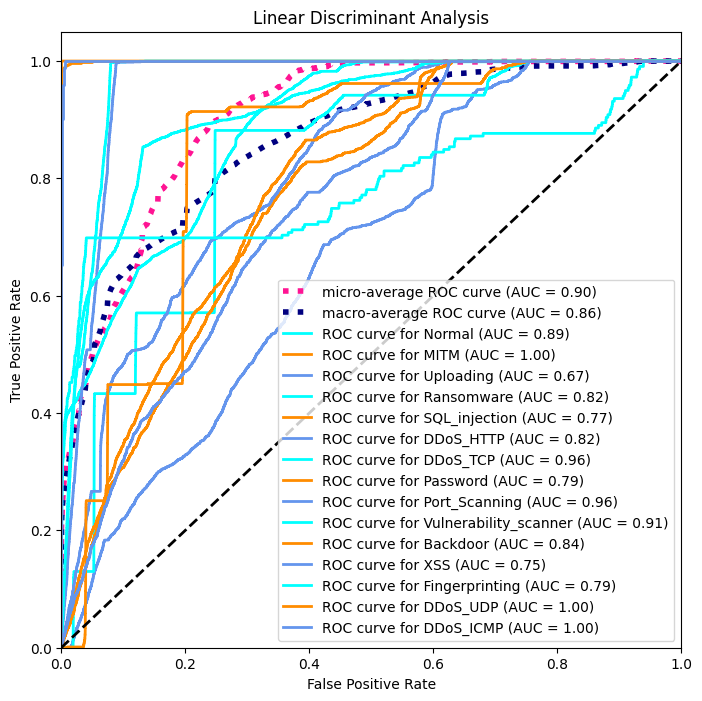

In [70]:
# Evaluate the LDA model
Evaluate('Linear Discriminant Analysis', LDA, X_test, Y_test)


----------------
## 12.Quadratic Discriminant Analysis (QDA)

In [71]:
# Instantiate the QDA model 
QDA = QuadraticDiscriminantAnalysis(reg_param=0.1) 
QDA.fit(X_train, Y_train)

QuadraticDiscriminantAnalysis(reg_param=0.1)

In [72]:
# Print the training and testing scores
print("Quadratic Discriminant Analysis Training Score:", QDA.score(X_train, Y_train))
print("Quadratic Discriminant Analysis Testing Score:", QDA.score(X_test, Y_test))


Quadratic Discriminant Analysis Training Score: 0.6040719423199908
Quadratic Discriminant Analysis Testing Score: 0.6028542143026098


In [ ]:
# Evaluate the QDA model
Evaluate('Quadratic Discriminant Analysis', QDA,  X_test, Y_test)

--------------------------------------------------

The Quadratic Discriminant Analysis Model Accuracy   = 0.6

The Quadratic Discriminant Analysis Model Precision  = 0.79

The Quadratic Discriminant Analysis Model Recall     = 0.6

The Quadratic Discriminant Analysis Model F1 Score   = 0.61

--------------------------------------------------



----------------
## 13.Passive Aggressive Classifier

In [ ]:
# Create PassiveAggressiveClassifier
PAC_classifier = PassiveAggressiveClassifier(C=0.1, max_iter=1000)

# Wrap PassiveAggressiveClassifier inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_PAC = CalibratedClassifierCV(PAC_classifier, method='sigmoid')

# Fit the classifier
Platt_PAC.fit(X_train, Y_train)

In [ ]:
# Print the training and testing scores
print("Passive Aggressive Classifier Training Score:", Platt_PAC.score(X_train, Y_train))
print("Passive Aggressive Classifier Testing Score:", Platt_PAC.score(X_test, Y_test))


In [ ]:
# Evaluate the Passive Aggressive Classifier
Evaluate('Passive Aggressive Classifier', Platt_PAC , X_test, Y_test)

________________
## 14. AdaBoost Classifier

In [ ]:
# Instantiate the base estimator (DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_features=6, max_depth=4)  

# Instantiate the AdaBoost Classifier with adjusted parameters
AdaBoost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=1.0)  
AdaBoost.fit(X_train, Y_train)

In [ ]:
# Print the training and testing scores
print("AdaBoost Classifier Training Score:", AdaBoost.score(X_train, Y_train))
print("AdaBoost Classifier Testing Score:", AdaBoost.score(X_test, Y_test))

In [ ]:
# Evaluate the AdaBoost Classifier
Evaluate('AdaBoost Classifier', AdaBoost, X_test, Y_test)

________________

## 15. Ridge Classifier

In [ ]:
# Create RidgeClassifier
ridge_classifier = RidgeClassifier(alpha=1.0)

# Wrap RidgeClassifier inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_ridge = CalibratedClassifierCV(ridge_classifier, method='sigmoid')

# Fit the classifier
Platt_ridge.fit(X_train, Y_train)


In [ ]:
# Print the training and testing scores
print("Ridge Classifier Training Score:", Platt_ridge.score(X_train, Y_train))
print("Ridge Classifier Testing Score:", Platt_ridge.score(X_test, Y_test))

In [ ]:
# Evaluate the Ridge Classifier
Evaluate('Ridge Classifier', Platt_ridge, X_test, Y_test)